<a href="https://colab.research.google.com/github/Shrinjita/MNIST/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPERIMENT 2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deep learning/weather_forecast.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Outlook'] + ' ' + df['Temperature'] + ' ' + df['Humidity'] + ' ' + df['Windy'])
y = df['Play'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the data into training and testing sets
X_train = X[:13]
X_test = X[13:]
y_train = y[:13]
y_test = y[13:]

# Train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Print the results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Custom prediction
custom_test = vectorizer.transform(['overcast mild high weak'])
custom_prediction = nb.predict(custom_test)
print("Prediction for Outlook=overcast, Temperature=mild, Humidity=high, Windy=weak:", 'yes' if custom_prediction[0] == 1 else 'no')


Accuracy: 1.0
Confusion Matrix:
 [[1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Prediction for Outlook=overcast, Temperature=mild, Humidity=high, Windy=weak: no


**EXPERIMENT 3**

In [ ]:
# Step 1- Import Data
import pandas as pd
import numpy as np
dib = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deep learning/diabetes.csv')  # Import data
print(dib.shape)  # Understand shape of the dataframe
dib.head()  # Look at few rows

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check columns
print(dib.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
# Step 2: Feature Engineering
X = dib[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Feature variables
y = dib['Outcome']  # Response variable

In [ ]:
# Step 3: Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Step 4: Build a binary classification model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      528
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -245.19
Date:                Wed, 31 Jul 2024   Deviance:                       490.37
Time:                        08:50:35   Pearson chi2:                     667.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3158
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.3762      0.908    -10.328      0.000     -11.155      -7.597
Pregnancies                  0.1084      0.039      2.803      0.005       0.033       0.184
Glucose                      0.0373      0.005      7.973      0.000       0.028       0.046
BloodPressure               -0.0096      0.006     -1.566      0.117      -0.022       0.002
SkinThickness               -0.0004      0.008     -0.048      0.962      -0.017       0.016
Insulin                     -0.0012      0.001     -1.103      0.270      -0.003       0.001
BMI                          0.0952      0.018      5.197      0.000       0.059       0.131
DiabetesPedigreeFunction     1.3783      0.367      3.758      0.000       0.659       2.097
Age                          0.0202      0.011      1.809      0.070      -0.002       0.042
============================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm)  # Predict diabetes

In [ ]:
# Step 5: Predict Diabetes
# Create a new dataframe named dib_train which will include original and predicted diabetes
data = {col: X_train[col] for col in X_train.columns}
data['Diabetes'] = y_train
data['y_train_pred'] = y_train_pred
dib_train = pd.DataFrame(data)

# Create predicted diabetes based on a 0.5 cut-off probability
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
dib_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes,y_train_pred,Diabetes_predicted
155,7,152,88,44,0,50.0,0.337,36,1,0.894943,1
150,1,136,74,50,204,37.4,0.399,24,0,0.360796,0
78,0,131,0,0,0,43.2,0.270,26,1,0.627636,1
9,8,125,96,0,0,0.0,0.232,54,1,0.033715,0
142,2,108,52,26,63,32.5,0.318,22,0,0.149560,0


In [ ]:
# Step 6: Confusion Matrix and Accuracy
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
confusion

array([[314,  36],
       [ 74, 113]])

In [ ]:
# Overall accuracy
print(metrics.accuracy_score(dib_train.Diabetes, dib_train.Diabetes_predicted))

0.7951582867783985


In [ ]:
# Step 7: Variation with Cut-Off
# Calculate Sensitivity, Specificity and accuracy with different probability cutoffs
numbers = [float(x) / 10 for x in range(10)]

for i in numbers:
    dib_train[i] = dib_train.y_train_pred.map(lambda x: 1 if x > i else 0)
dib_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes,y_train_pred,...,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
155,7,152,88,44,0,50.0,0.337,36,1,0.894943,...,1,1,1,1,1,1,1,1,1,0
150,1,136,74,50,204,37.4,0.399,24,0,0.360796,...,1,1,1,1,0,0,0,0,0,0
78,0,131,0,0,0,43.2,0.270,26,1,0.627636,...,1,1,1,1,1,1,1,0,0,0
9,8,125,96,0,0,0.0,0.232,54,1,0.033715,...,1,0,0,0,0,0,0,0,0,0
142,2,108,52,26,63,32.5,0.318,22,0,0.149560,...,1,1,0,0,0,0,0,0,0,0


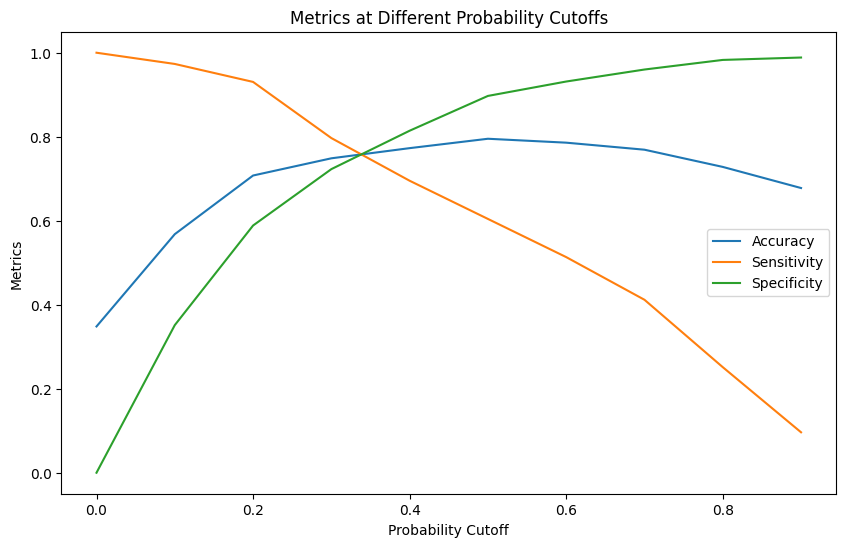

In [ ]:

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in num:
    cm1 = metrics.confusion_matrix(dib_train.Diabetes, dib_train[i])
    total1 = sum(sum(cm1))
    Accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    Specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    Sensitivity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]
# Plot accuracy, sensitivity, and specificity for various probabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cutoff_df['Probability'], cutoff_df['Accuracy'], label='Accuracy')
plt.plot(cutoff_df['Probability'], cutoff_df['Sensitivity'], label='Sensitivity')
plt.plot(cutoff_df['Probability'], cutoff_df['Specificity'], label='Specificity')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics')
plt.title('Metrics at Different Probability Cutoffs')
plt.legend()
plt.show()

TRYOUT 2

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris=load_iris()
X=iris.data
Y=iris.target
print("Size of Dataset {}".format(len(X)))
logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 150
Accuracy score on training set is 0.9619047619047619
Accuracy score on test set is 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score
iris=load_iris()
X=iris.data
Y=iris.target
loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Cross Validation score :0.94


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data
Y = iris.target
logreg = LogisticRegression(max_iter=200)
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(logreg, X, Y, cv=skf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score: {}".format(score.mean()))

Cross Validation Scores are [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Cross Validation score: 0.9733333333333334


When comparing different cross-validation techniques on the Iris dataset, each method offers unique advantages and potential insights into model performance. Here's an inference based on using these four methods:

1. **Hold Out Cross-Validation**:
    - **Method**: The dataset is split into two parts: training and testing. Typically, a common split is 80/20 or 70/30.
    - **Inference**: This method is simple and quick but can be subject to variability depending on the split. If the training and testing sets are not representative, the model performance might be misleading. It provides a snapshot of model performance but doesn't utilize the entire dataset for training.

2. **K-Fold Cross-Validation**:
    - **Method**: The dataset is divided into `k` equal parts. The model is trained on `k-1` parts and tested on the remaining part. This process is repeated `k` times, with each part used exactly once as the testing set.
    - **Inference**: K-Fold cross-validation provides a more reliable estimate of model performance compared to hold-out validation. By training and testing on different subsets of the data, it reduces the variance in performance estimation. It ensures that every data point is used for both training and testing, providing a more comprehensive assessment.

3. **Stratified K-Fold Cross-Validation**:
    - **Method**: Similar to K-Fold, but the data is split in such a way that each fold has approximately the same proportion of classes as the entire dataset.
    - **Inference**: Stratified K-Fold is especially useful for imbalanced datasets. For the Iris dataset, which has balanced classes, it ensures that each fold is representative of the overall class distribution. This typically leads to more stable and reliable performance metrics compared to regular K-Fold, especially if there are any minor imbalances.

4. **Leave One Out Cross-Validation (LOOCV)**:
    - **Method**: Each data point is used once as a test set while the remaining data points are used as the training set. This process is repeated for every data point in the dataset.
    - **Inference**: LOOCV uses the maximum amount of data for training in each iteration, providing a very thorough assessment. However, it is computationally expensive and can be impractical for large datasets. For the Iris dataset, LOOCV would be feasible and could provide very detailed insights into model performance but might overestimate variance due to the high number of splits.

**Overall Comparison**:
- **Hold Out**: Quick and simple but less reliable due to potential data split variability.
- **K-Fold**: Balances between computational efficiency and reliable performance estimation.
- **Stratified K-Fold**: Enhances K-Fold by ensuring class distribution consistency across folds, providing more stable results.
- **LOOCV**: Provides the most detailed and least biased performance estimate but is computationally intensive.

For the Iris dataset, which is relatively small and balanced, **Stratified K-Fold** cross-validation often strikes the best balance between reliability and computational efficiency, ensuring that each fold is representative of the overall class distribution.

EXPERIMENT 4

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


Load and preprocess the MNIST dataset

In [ ]:
# Load the MNIST dataset from sklearn
mnist = fetch_openml('mnist_784')

# Extract features and labels
X = mnist.data
y = mnist.target.astype(int)  # Ensure labels are integers

# Reshape the data for the CNN model
X = X.values.reshape(-1, 28, 28, 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Preprocess the data by scaling the features for NN model
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Build the dense neural network model

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(45, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(35, activation='relu'))
nn_model.add(Dense(23, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

# Compile the dense model with Adam optimizer
nn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the dense model
nn_model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the dense model
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test_encoded)
print("Dense Model Accuracy:", accuracy)

# Make predictions with the dense model
y_pred_encoded = nn_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Print classification report and confusion matrix for the dense model
print("Dense Model Classification Report:")
print(classification_report(y_test, y_pred))

print("Dense Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7388 - loss: 0.8322 - val_accuracy: 0.9324 - val_loss: 0.2430
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9061 - loss: 0.3142 - val_accuracy: 0.9400 - val_loss: 0.2648
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9218 - loss: 0.2687 - val_accuracy: 0.9464 - val_loss: 0.2273
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9287 - loss: 0.2383 - val_accuracy: 0.9503 - val_loss: 0.2162
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9329 - loss: 0.2243 - val_accuracy: 0.9513 - val_loss: 0.2476
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9402 - loss: 0.2018 - val_accuracy: 0.9531 - val_loss: 0.2452
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9366 - loss: 0.2011 - val_accuracy: 0.9552 - val_loss: 0.1957
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9405 - loss: 0.1951 - 

Build the convolutional neural network model

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(28, (5, 5), padding='same', input_shape=X_train.shape[1:]))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(28, (5, 5)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(32, (5, 5), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, (5, 5)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(10))
cnn_model.add(Activation('softmax'))

# Compile the CNN model with Adam optimizer
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the CNN model
loss, accuracy = cnn_model.evaluate(X_test, y_test_encoded)
print("CNN Model Accuracy:", accuracy)

# Make predictions with the CNN model
y_pred_encoded = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Print classification report and confusion matrix for the CNN model
print("CNN Model Classification Report:")
print(classification_report(y_test, y_pred))

print("CNN Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8932 - loss: 0.3533 - val_accuracy: 0.9744 - val_loss: 0.0845
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9797 - loss: 0.0691 - val_accuracy: 0.9860 - val_loss: 0.0448
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9839 - loss: 0.0539 - val_accuracy: 0.9913 - val_loss: 0.0304
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0491 - val_accuracy: 0.9872 - val_loss: 0.0412
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9872 - loss: 0.0435 - val_accuracy: 0.9885 - val_loss: 0.0431
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9875 - loss: 0.0428 - val_accuracy: 0.9915 - val_loss: 0.0333
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9904 - loss: 0.0338 - val_accuracy: 0.9891 - val_loss: 0.0363
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0342

EXPERIMENT 5 PRIMA DIABETES

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

# load the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deep learning/primadiabetes.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset.iloc[:, 0:8].values  # Use .iloc to access by index
y = dataset.iloc[:, 8].values

# print the split data
print(X)
print(y)

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy * 100))

# make probability predictions with the model
Xp = np.array([[6.0, 158.0, 72.0, 35.0, 0.0, 55.5, 0.627, 50.0]])
Yp = model.predict(Xp)
print(Xp[0], Yp[0])

# save the model
model.save("First_ANN")


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6231 - loss: 9.3262
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5867 - loss: 2.6929
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5783 - loss: 1.0222
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6369 - loss: 0.7087
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 0.6495
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6972 - loss: 0.6058
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - loss: 0.7199
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6641
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6577 - loss: 0.6720
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6765 - loss: 0.6644
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.6086
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=First_ANN.

EXPERIMENT 6 - ACTIVATION FUNCTION

In [ ]:
import numpy as np

def sigmoid_function(x):
    z = 1 / (1 + np.exp(-x))
    return z

print(sigmoid_function(7))
print(sigmoid_function(-22))

import numpy as np

def tanh_function(x):
    z = (2 / (1 + np.exp(-2 * x))) - 1
    return z

print(tanh_function(0.5))
print(tanh_function(-1))

def relu_function(x):
    if x < 0:
        return 0
    else:
        return x

print(relu_function(7))
print(relu_function(-7))

import numpy as np

def softmax_function(x):
    z = np.exp(x)
    z = z / z.sum()
    return z

print(softmax_function([0.8, 1.2, 3.1]))

0.9990889488055994
2.7894680920908113e-10
0.4621171572600098
-0.7615941559557649
7
0
[0.08021815 0.11967141 0.80011044]


In [ ]:
# Importing necessary libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deep learning/housepricedata.csv')

# Converting categorical columns to numeric using LabelEncoder (if necessary)
# Assuming 'yes' is part of a categorical column, replace 'your_categorical_column' with actual column names
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        labelencoder = LabelEncoder()
        df[column] = labelencoder.fit_transform(df[column])

# Preparing the dataset
dataset = df.values

# Splitting the dataset into X (features) and Y (target)
X = dataset[:, 0:10]
Y = dataset[:, 10]

# Scaling the features using MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

# Splitting the data into training, validation, and test sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# Printing the shapes of the resulting datasets
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
# Output should be: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

# Initializing the Neural Network
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),  # First hidden layer with 32 neurons
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dense(1, activation='sigmoid'),  # Output layer with 1 neuron
])

# Compiling the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


(381, 10) (82, 10) (82, 10) (381,) (82,) (82,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2513 - loss: 0.6144 - val_accuracy: 0.2439 - val_loss: 0.6519
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2629 - loss: 0.6268 - val_accuracy: 0.2439 - val_loss: 0.6475
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2478 - loss: 0.5658 - val_accuracy: 0.2439 - val_loss: 0.6442
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2512 - loss: 0.5613 - val_accuracy: 0.2439 - val_loss: 0.6418
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2333 - loss: 0.5690 - val_accuracy: 0.2439 - val_loss: 0.6409
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1977 - loss: 0.5266 - val_accuracy: 0.2439 - val_loss: 0.6409
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2148 - loss: 0.5506 - val_accuracy: 0.2439 - val_loss: 0.6416
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2466 - loss: 0.5447 - val_accuracy: 0.2439 -

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the pixel values to a range between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into 1D arrays
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
encoding_dim = 32 # Dimensionality of the encoded representations
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = tf.keras.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

# Predict reconstructed images
decoded_imgs = autoencoder.predict(x_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4947 - val_loss: 0.3435
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3334 - val_loss: 0.3192
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3144 - val_loss: 0.3078
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3030 - val_loss: 0.3002
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2968 - val_loss: 0.2951
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2919 - val_loss: 0.2923
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2901 - val_loss: 0.2903
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2873 - val_loss: 0.2891
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2868 - val_loss: 0.2883
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━

Deep and Shallow Autoencoders using mnist


In [5]:
!pip install tensorflow keras numpy matplotlib

In [10]:
import numpy as np
from keras import models
from keras.layers import Input, Dense
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data: flatten images and normalize
x_train_flat = x_train.reshape((x_train.shape[0], -1)) / 255.0  # Shape: (60000, 784)
x_test_flat = x_test.reshape((x_test.shape[0], -1)) / 255.0     # Shape: (10000, 784)

# Build a deep autoencoder
input_layer = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
deep_autoencoder = models.Model(inputs=input_layer, outputs=decoded)

# Compile the deep autoencoder
deep_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the deep autoencoder
deep_autoencoder.fit(x_train_flat, x_train_flat, epochs=50, batch_size=256, shuffle=True)

# Create the encoder model for the deep autoencoder
deep_encoder = models.Model(inputs=deep_autoencoder.input, outputs=deep_autoencoder.layers[2].output)

# Extract features from the test set for the deep autoencoder
deep_features = deep_encoder.predict(x_test_flat)

# Check the shape of extracted features
print(f"Deep features shape: {deep_features.shape}")  # Should be (10000, 32)

# Train-test split for deep features
X_train_deep, X_val_deep, y_train_deep, y_val_deep = train_test_split(deep_features, y_test, test_size=0.2, random_state=42)

# Classifier for deep features
classifier_deep = LogisticRegression(max_iter=1000)
classifier_deep.fit(X_train_deep, y_train_deep)

# Predictions and evaluation for deep features
y_pred_deep = classifier_deep.predict(X_val_deep)
print("Deep Autoencoder Classification Report:")
print(classification_report(y_val_deep, y_pred_deep))
print(f"Deep Autoencoder F1 Score: {f1_score(y_val_deep, y_pred_deep, average='weighted')}")

# Build a shallow autoencoder
shallow_input_layer = Input(shape=(784,))
shallow_encoded = Dense(64, activation='relu')(shallow_input_layer)
shallow_decoded = Dense(784, activation='sigmoid')(shallow_encoded)
shallow_autoencoder = models.Model(inputs=shallow_input_layer, outputs=shallow_decoded)

# Compile the shallow autoencoder
shallow_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the shallow autoencoder
shallow_autoencoder.fit(x_train_flat, x_train_flat, epochs=50, batch_size=256, shuffle=True)

# Create the encoder model for the shallow autoencoder
shallow_encoder = models.Model(inputs=shallow_autoencoder.input, outputs=shallow_autoencoder.layers[1].output)

# Extract features from the test set for the shallow autoencoder
shallow_features = shallow_encoder.predict(x_test_flat)

# Check the shape of extracted features
print(f"Shallow features shape: {shallow_features.shape}")  # Should be (10000, 64)

# Train-test split for shallow features
X_train_shallow, X_val_shallow, y_train_shallow, y_val_shallow = train_test_split(shallow_features, y_test, test_size=0.2, random_state=42)

# Classifier for shallow features
classifier_shallow = LogisticRegression(max_iter=1000)
classifier_shallow.fit(X_train_shallow, y_train_shallow)

# Predictions and evaluation for shallow features
y_pred_shallow = classifier_shallow.predict(X_val_shallow)
print("Shallow Autoencoder Classification Report:")
print(classification_report(y_val_shallow, y_pred_shallow))
print(f"Shallow Autoencoder F1 Score: {f1_score(y_val_shallow, y_pred_shallow, average='weighted')}")


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0952
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0326
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0238
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0205
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0186
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0170
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0160
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0145
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0138
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0134
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0128
Epoch 13/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0124
Epoch 14/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120
Epoch 15/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Deep Autoencoder Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       203
           1       0.96      0.96      0.96       216
           2       0.88      0.92      0.90       213
           3       0.92      0.91      0.91       208
           4       0.93      0.87      0.90       215
           5       0.85      0.87      0.86       174
           6       0.93      0.93      0.93       200
           7       0.90      0.93      0.91       187
           8       0.93      0.87      0.90       186
           9       0.88      0.89      0.89       198

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Deep Autoencoder F1 Score: 0.9134532706781382
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0966
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0294
Epoch 3/50
235/235 ━━

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MNIST 784 Variational Autoencoder (VAE)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set up device (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
latent_dim = 20
batch_size = 128
learning_rate = 1e-3
epochs = 10

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Variational Autoencoder model
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, latent_dim)  # mu layer
        self.fc22 = nn.Linear(400, latent_dim)  # logvar layer
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)  # Return mean and log variance

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))  # Output in [0, 1]

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    # KL divergence
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Initialize the model, optimizer
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}')
    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

# Testing
def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
    test_loss /= len(test_loader.dataset)
    print(f'====> Test set loss: {test_loss:.4f}')

# Run training and testing
for epoch in range(1, epochs + 1):
    train(epoch)
    test(epoch)


Train Epoch: 1 [0/60000 (0%)]	Loss: 546.712952
Train Epoch: 1 [12800/60000 (21%)]	Loss: 190.700165
Train Epoch: 1 [25600/60000 (43%)]	Loss: 155.847733
Train Epoch: 1 [38400/60000 (64%)]	Loss: 142.668930
Train Epoch: 1 [51200/60000 (85%)]	Loss: 135.765289
====> Epoch: 1 Average loss: 164.2003
====> Test set loss: 127.1140
Train Epoch: 2 [0/60000 (0%)]	Loss: 128.097839
Train Epoch: 2 [12800/60000 (21%)]	Loss: 129.731049
Train Epoch: 2 [25600/60000 (43%)]	Loss: 121.028435
Train Epoch: 2 [38400/60000 (64%)]	Loss: 121.159935
Train Epoch: 2 [51200/60000 (85%)]	Loss: 120.471878
====> Epoch: 2 Average loss: 121.0527
====> Test set loss: 115.7938
Train Epoch: 3 [0/60000 (0%)]	Loss: 113.664688
Train Epoch: 3 [12800/60000 (21%)]	Loss: 112.685486
Train Epoch: 3 [25600/60000 (43%)]	Loss: 112.139702
Train Epoch: 3 [38400/60000 (64%)]	Loss: 114.580826
Train Epoch: 3 [51200/60000 (85%)]	Loss: 115.815033
====> Epoch: 3 Average loss: 114.2039
====> Test set loss: 111.4041
Train Epoch: 4 [0/60000 (0%)]	L